In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [35]:
DT = datasets.load_digits()
DF = pd.DataFrame(DT.data, columns=DT.feature_names)
X = DF[:1000]
Y = DT.target[:1000]
XTEST = DF[1001:]
YTEST = DT.target[1001:]

# <font color="brown">MNIST D3 (Entropy)</font>

In [134]:
D3 = DecisionTreeClassifier(criterion='entropy')
D3.fit(X,Y)

predicted = D3.predict(XTEST)
expected = YTEST

report = metrics.classification_report(expected,predicted,output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        79
           1       0.71      0.61      0.65        79
           2       0.76      0.81      0.78        77
           3       0.79      0.71      0.75        79
           4       0.88      0.83      0.86        83
           5       0.66      0.84      0.74        82
           6       0.78      0.95      0.86        80
           7       0.73      0.68      0.70        80
           8       0.64      0.57      0.60        76
           9       0.72      0.75      0.73        81

    accuracy                           0.76       796
   macro avg       0.76      0.76      0.76       796
weighted avg       0.76      0.76      0.76       796



# <font color="brown">MNIST D3 (Gini)</font>

In [88]:
D3 = DecisionTreeClassifier(criterion='gini')
D3.fit(X,Y)

predicted = D3.predict(XTEST)
expected = YTEST

report = metrics.classification_report(expected,predicted,output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        79
           1       0.65      0.47      0.54        79
           2       0.90      0.73      0.81        77
           3       0.75      0.80      0.77        79
           4       0.77      0.84      0.80        83
           5       0.70      0.85      0.77        82
           6       0.91      0.84      0.87        80
           7       0.91      0.78      0.84        80
           8       0.53      0.62      0.57        76
           9       0.70      0.79      0.74        81

    accuracy                           0.77       796
   macro avg       0.78      0.77      0.77       796
weighted avg       0.78      0.77      0.77       796



In [8]:
from six import StringIO
from IPython.display import Image as IMG
from sklearn.tree import  export_graphviz
import pydotplus

In [9]:
# sudo apt-get install graphviz

dot_data = StringIO()
export_graphviz(D3, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
IMG(graph.create_png())

# <font color="brown">Diabetes D3</font>

In [135]:
DF = pd.read_csv('../../../datasets/Diabetes.csv')
X = DF.iloc[:750,:-1]
Y = DF.iloc[:750,-1]
XTEST = DF.iloc[751:,:-1]
YTEST = DF.iloc[751:,-1]

DF.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [218]:
D3 = DecisionTreeClassifier(criterion='gini',max_features=5)
D3.fit(X,Y)

predicted = D3.predict(XTEST)
expected = YTEST

report = metrics.classification_report(expected,predicted,output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.86      0.86      0.86         7

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17



In [234]:
D3 = DecisionTreeClassifier(criterion='entropy',max_features=8)
D3.fit(X,Y)

predicted = D3.predict(XTEST)
expected = YTEST

report = metrics.classification_report(expected,predicted,output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.83      0.71      0.77         7

    accuracy                           0.82        17
   macro avg       0.83      0.81      0.81        17
weighted avg       0.82      0.82      0.82        17



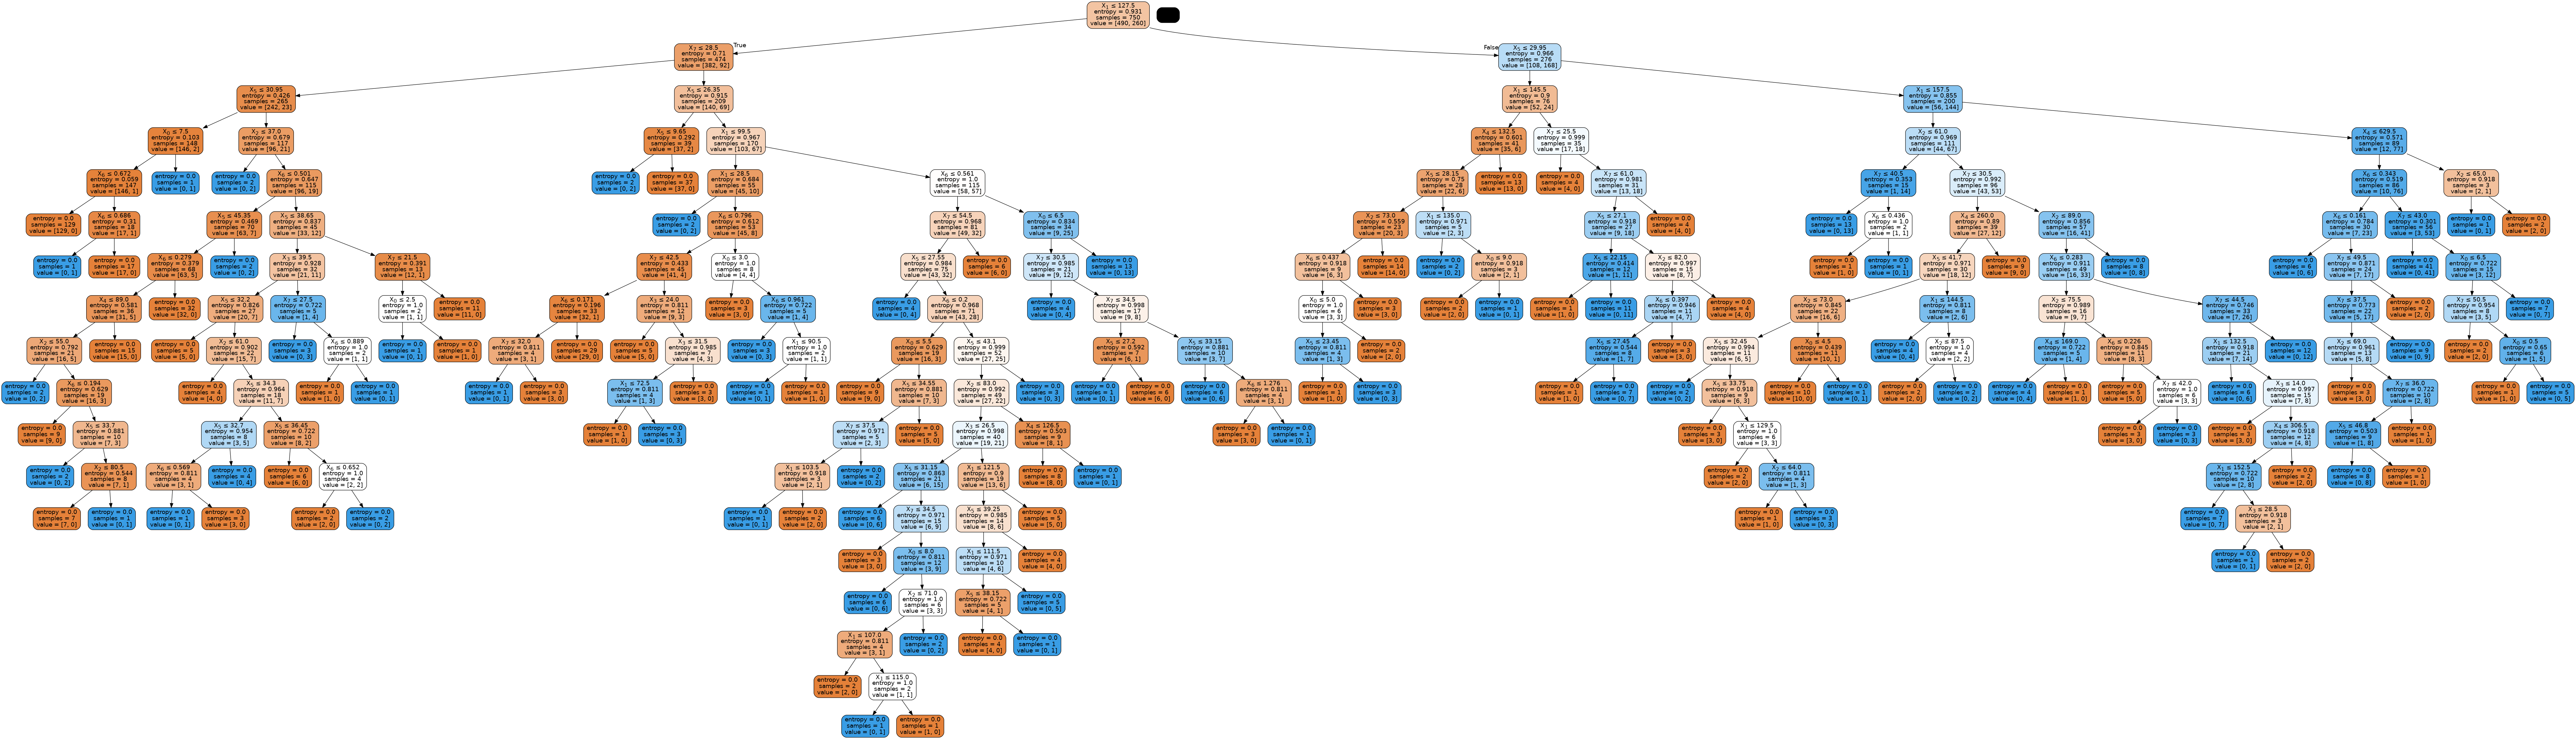

In [205]:
dot_data = StringIO()
export_graphviz(D3, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
IMG(graph.create_png())